In [1]:
import pandas as pd

df = pd.read_csv("c:\data\e-commerce\ecommerce_customer_data_large.csv")
df.head(3)

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0


In [2]:
from IPython.display import display
def summarize_df(df, head=3):
    
    print("Shape\n")
    shape_df = pd.DataFrame(df.shape).T
    shape_df.columns = ['Rows', 'Columns']
    display(shape_df)
    
    print("Dublicates Check\n")
    df_duplicates = df.duplicated().sum()
    print(f"Number of duplicate rows in data: {df_duplicates}\n")
    
    print("\nHead\n")
    display(df.head(head))
    
    print("\nTail\n")
    display(df.tail(head))
    
    print("\nIs Null\n")
    display(df.isnull().sum())
    
    print("\nDescribe\n")
    display(df.describe())
    
summarize_df(df)

Shape



,Rows,Columns
0,250000,13


Dublicates Check

Number of duplicate rows in data: 0


Head



,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0



Tail



,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
249997,28055,2022-11-10 17:11:57,Electronics,441,5,5296,Cash,63,NaN,Lisa Johnson,63,Female,0
249998,15023,2021-06-27 14:42:12,Electronics,44,2,2517,Cash,64,1.0,Melissa Fernandez,64,Male,0
249999,4148,2020-09-07 05:12:19,Home,307,5,3634,Cash,32,0.0,Angela Norton,32,Male,0



Is Null



Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47382
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64


Describe



,Customer ID,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Age,Churn
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,202618.000000,250000.000000,250000.00000
mean,25017.632092,254.742724,3.004936,2725.385196,43.798276,0.500824,43.798276,0.20052
std,14412.515718,141.738104,1.414737,1442.576095,15.364915,0.500001,15.364915,0.40039
min,1.000000,10.000000,1.000000,100.000000,18.000000,0.000000,18.000000,0.00000
25%,12590.000000,132.000000,2.000000,1476.000000,30.000000,0.000000,30.000000,0.00000
50%,25011.000000,255.000000,3.000000,2725.000000,44.000000,1.000000,44.000000,0.00000
75%,37441.250000,377.000000,4.000000,3975.000000,57.000000,1.000000,57.000000,0.00000
max,50000.000000,500.000000,5.000000,5350.000000,70.000000,1.000000,70.000000,1.00000


In [3]:
# Customer ID	Purchase Date	Product Category	Product Price	Quantity	Total Purchase Amount	Payment Method	Customer Age	Returns	Customer Name	Age	Gender	Churn
df.columns = ['customer_id', 'purchase_date', 'product_category', 'product_price', 'quantity', 'total_purchase_amount', 'payment_method', 'customer_age', 'returns', 'customer_name', 'age', 'gender', 'churn']

In [4]:
df.drop(['customer_name'], axis=1, inplace=True)
df.columns

Index(['customer_id', 'purchase_date', 'product_category', 'product_price',
       'quantity', 'total_purchase_amount', 'payment_method', 'customer_age',
       'returns', 'age', 'gender', 'churn'],
      dtype='object')

In [5]:
df['product_category'].value_counts()

product_category
Electronics    62630
Clothing       62581
Home           62542
Books          62247
Name: count, dtype: int64

In [6]:
df.groupby(['customer_id', 'product_category']).total_purchase_amount.sum()

customer_id  product_category
1            Books                5148
             Clothing              385
             Electronics           757
2            Books                4693
             Clothing              679
                                 ...  
49999        Electronics          5166
             Home                 3682
50000        Books                4729
             Clothing            12455
             Home                 4743
Name: total_purchase_amount, Length: 142623, dtype: int64

In [7]:
df[(df['customer_id'] == 1) & (df['product_category'] == 'Electronics')]

,customer_id,purchase_date,product_category,product_price,quantity,total_purchase_amount,payment_method,customer_age,returns,age,gender,churn
160922,1,2022-11-29 06:48:25,Electronics,459,5,757,Credit Card,67,NaN,67,Female,0


In [8]:
len(df[(df['churn']) == 1])

50130

In [9]:
len(df['customer_id'].unique())

49661

In [10]:
df.head(2)

,customer_id,purchase_date,product_category,product_price,quantity,total_purchase_amount,payment_method,customer_age,returns,age,gender,churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,31,Female,0


In [11]:
import datetime as dt
df['purchase_date'] = pd.to_datetime(df['purchase_date'])
df = df.sort_values(by='purchase_date', ascending=True)

# def select_date_range(df, year):
#     return df[(df['purchase_date'] >= f"{year}-01-01") & (df['purchase_date'] <= f"{year}-12-31")]
# df = select_date_range(df, 2022)
# df.head(2)

def get_month(x):
    return dt.datetime(x.year, x.month, 1)
df['purchase_month'] = df['purchase_date'].apply(get_month)
df.head(2)

,customer_id,purchase_date,product_category,product_price,quantity,total_purchase_amount,payment_method,customer_age,returns,age,gender,churn,purchase_month
231894,11789,2020-01-01 00:07:26,Clothing,426,4,2046,Cash,45,1.0,45,Male,0,2020-01-01
159409,48592,2020-01-01 00:11:40,Clothing,160,4,2514,Cash,49,0.0,49,Male,0,2020-01-01


In [12]:
df['purchase_month'] = df.groupby('customer_id')['purchase_month'].transform('min')
df.tail(30)

,customer_id,purchase_date,product_category,product_price,quantity,total_purchase_amount,payment_method,customer_age,returns,age,gender,churn,purchase_month
226889,28266,2023-09-13 14:47:38,Books,466,5,2154,PayPal,44,1.0,44,Female,0,2022-11-01
2081,28427,2023-09-13 14:54:07,Home,75,4,280,PayPal,50,0.0,50,Male,0,2020-05-01
193961,21616,2023-09-13 14:58:02,Home,364,2,3783,Cash,61,0.0,61,Male,0,2021-06-01
66423,36025,2023-09-13 14:58:46,Home,178,2,350,Cash,57,0.0,57,Male,0,2020-07-01
101949,48799,2023-09-13 15:09:48,Electronics,412,5,2012,Cash,66,0.0,66,Male,0,2020-01-01
21792,1225,2023-09-13 15:11:07,Clothing,491,4,4277,Cash,58,1.0,58,Female,0,2020-10-01
40893,6159,2023-09-13 15:13:38,Clothing,388,4,2492,PayPal,51,0.0,51,Male,0,2020-01-01
119504,35854,2023-09-13 15:34:02,Home,315,5,1805,PayPal,59,0.0,59,Male,1,2020-10-01
39296,39847,2023-09-13 15:46:11,Clothing,294,2,1862,Credit Card,34,0.0,34,Female,1,2021-01-01
101832,12398,2023-09-13 15:48:46,Books,402,2,4656,PayPal,22,NaN,22,Female,1,2020-08-01


In [13]:
def get_data_elements(df, column):
    day = df[column].dt.day
    month = df[column].dt.month
    year = df[column].dt.year
    return day, month, year

In [14]:
_, purchase_month, purchase_year = get_data_elements(df, 'purchase_date')
_, cohort_month, cohort_year = get_data_elements(df, 'purchase_month')
display(purchase_month.tail(2))
display(cohort_month.tail(2))

125841    9
5163      9
Name: purchase_date, dtype: int32

125841    1
5163      8
Name: purchase_month, dtype: int32

In [15]:
year_diff = purchase_year - cohort_year
month_diff = purchase_month - cohort_month
df['cohort_index'] = year_diff * 12 + month_diff + 1 # 시작을 1부터 하기 위한 +1 
df.tail(2)

,customer_id,purchase_date,product_category,product_price,quantity,total_purchase_amount,payment_method,customer_age,returns,age,gender,churn,purchase_month,cohort_index
125841,37031,2023-09-13 18:37:07,Books,240,3,3998,Credit Card,25,0.0,25,Female,0,2021-01-01,33
5163,43799,2023-09-13 18:42:49,Clothing,43,2,2076,PayPal,66,0.0,66,Female,0,2021-08-01,26


In [16]:
cohort_df = df.groupby(['purchase_month', 'cohort_index'])['customer_id'].apply(pd.Series.nunique).reset_index()
cohort_df.head(5)

,purchase_month,cohort_index,customer_id
0,2020-01-01,1,5411
1,2020-01-01,2,576
2,2020-01-01,3,576
3,2020-01-01,4,569
4,2020-01-01,5,582


In [17]:
cohort_table = cohort_df.pivot(index='purchase_month', columns=['cohort_index'], values='customer_id')
cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,45
purchase_month,,,,,,,,,,,,,,,,,,,,,
2020-01-01,5411.0,576.0,576.0,569.0,582.0,584.0,587.0,580.0,552.0,600.0,...,548.0,558.0,547.0,559.0,583.0,588.0,562.0,570.0,569.0,241.0
2020-02-01,4499.0,449.0,449.0,496.0,465.0,473.0,493.0,450.0,508.0,462.0,...,507.0,435.0,470.0,474.0,463.0,467.0,492.0,477.0,205.0,NaN
2020-03-01,4338.0,476.0,469.0,476.0,502.0,508.0,447.0,453.0,481.0,458.0,...,404.0,448.0,430.0,454.0,422.0,466.0,472.0,214.0,NaN,NaN
2020-04-01,3803.0,388.0,384.0,424.0,415.0,426.0,420.0,398.0,463.0,396.0,...,447.0,393.0,407.0,402.0,439.0,405.0,166.0,NaN,NaN,NaN
2020-05-01,3485.0,361.0,420.0,422.0,402.0,361.0,362.0,366.0,368.0,330.0,...,354.0,380.0,355.0,366.0,381.0,167.0,NaN,NaN,NaN,NaN
2020-06-01,2967.0,353.0,315.0,291.0,340.0,322.0,324.0,329.0,272.0,293.0,...,334.0,288.0,291.0,325.0,137.0,NaN,NaN,NaN,NaN,NaN
2020-07-01,2703.0,313.0,265.0,301.0,319.0,290.0,283.0,288.0,269.0,290.0,...,293.0,320.0,293.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,2548.0,257.0,301.0,272.0,287.0,270.0,228.0,251.0,261.0,309.0,...,279.0,276.0,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,2146.0,242.0,252.0,242.0,225.0,227.0,248.0,232.0,220.0,224.0,...,249.0,106.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
cohort_table.index = cohort_table.index.strftime('%B %Y')
cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,45
purchase_month,,,,,,,,,,,,,,,,,,,,,
January 2020,5411.0,576.0,576.0,569.0,582.0,584.0,587.0,580.0,552.0,600.0,...,548.0,558.0,547.0,559.0,583.0,588.0,562.0,570.0,569.0,241.0
February 2020,4499.0,449.0,449.0,496.0,465.0,473.0,493.0,450.0,508.0,462.0,...,507.0,435.0,470.0,474.0,463.0,467.0,492.0,477.0,205.0,NaN
March 2020,4338.0,476.0,469.0,476.0,502.0,508.0,447.0,453.0,481.0,458.0,...,404.0,448.0,430.0,454.0,422.0,466.0,472.0,214.0,NaN,NaN
April 2020,3803.0,388.0,384.0,424.0,415.0,426.0,420.0,398.0,463.0,396.0,...,447.0,393.0,407.0,402.0,439.0,405.0,166.0,NaN,NaN,NaN
May 2020,3485.0,361.0,420.0,422.0,402.0,361.0,362.0,366.0,368.0,330.0,...,354.0,380.0,355.0,366.0,381.0,167.0,NaN,NaN,NaN,NaN
June 2020,2967.0,353.0,315.0,291.0,340.0,322.0,324.0,329.0,272.0,293.0,...,334.0,288.0,291.0,325.0,137.0,NaN,NaN,NaN,NaN,NaN
July 2020,2703.0,313.0,265.0,301.0,319.0,290.0,283.0,288.0,269.0,290.0,...,293.0,320.0,293.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN
August 2020,2548.0,257.0,301.0,272.0,287.0,270.0,228.0,251.0,261.0,309.0,...,279.0,276.0,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
September 2020,2146.0,242.0,252.0,242.0,225.0,227.0,248.0,232.0,220.0,224.0,...,249.0,106.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='cohort_index', ylabel='purchase_month'>

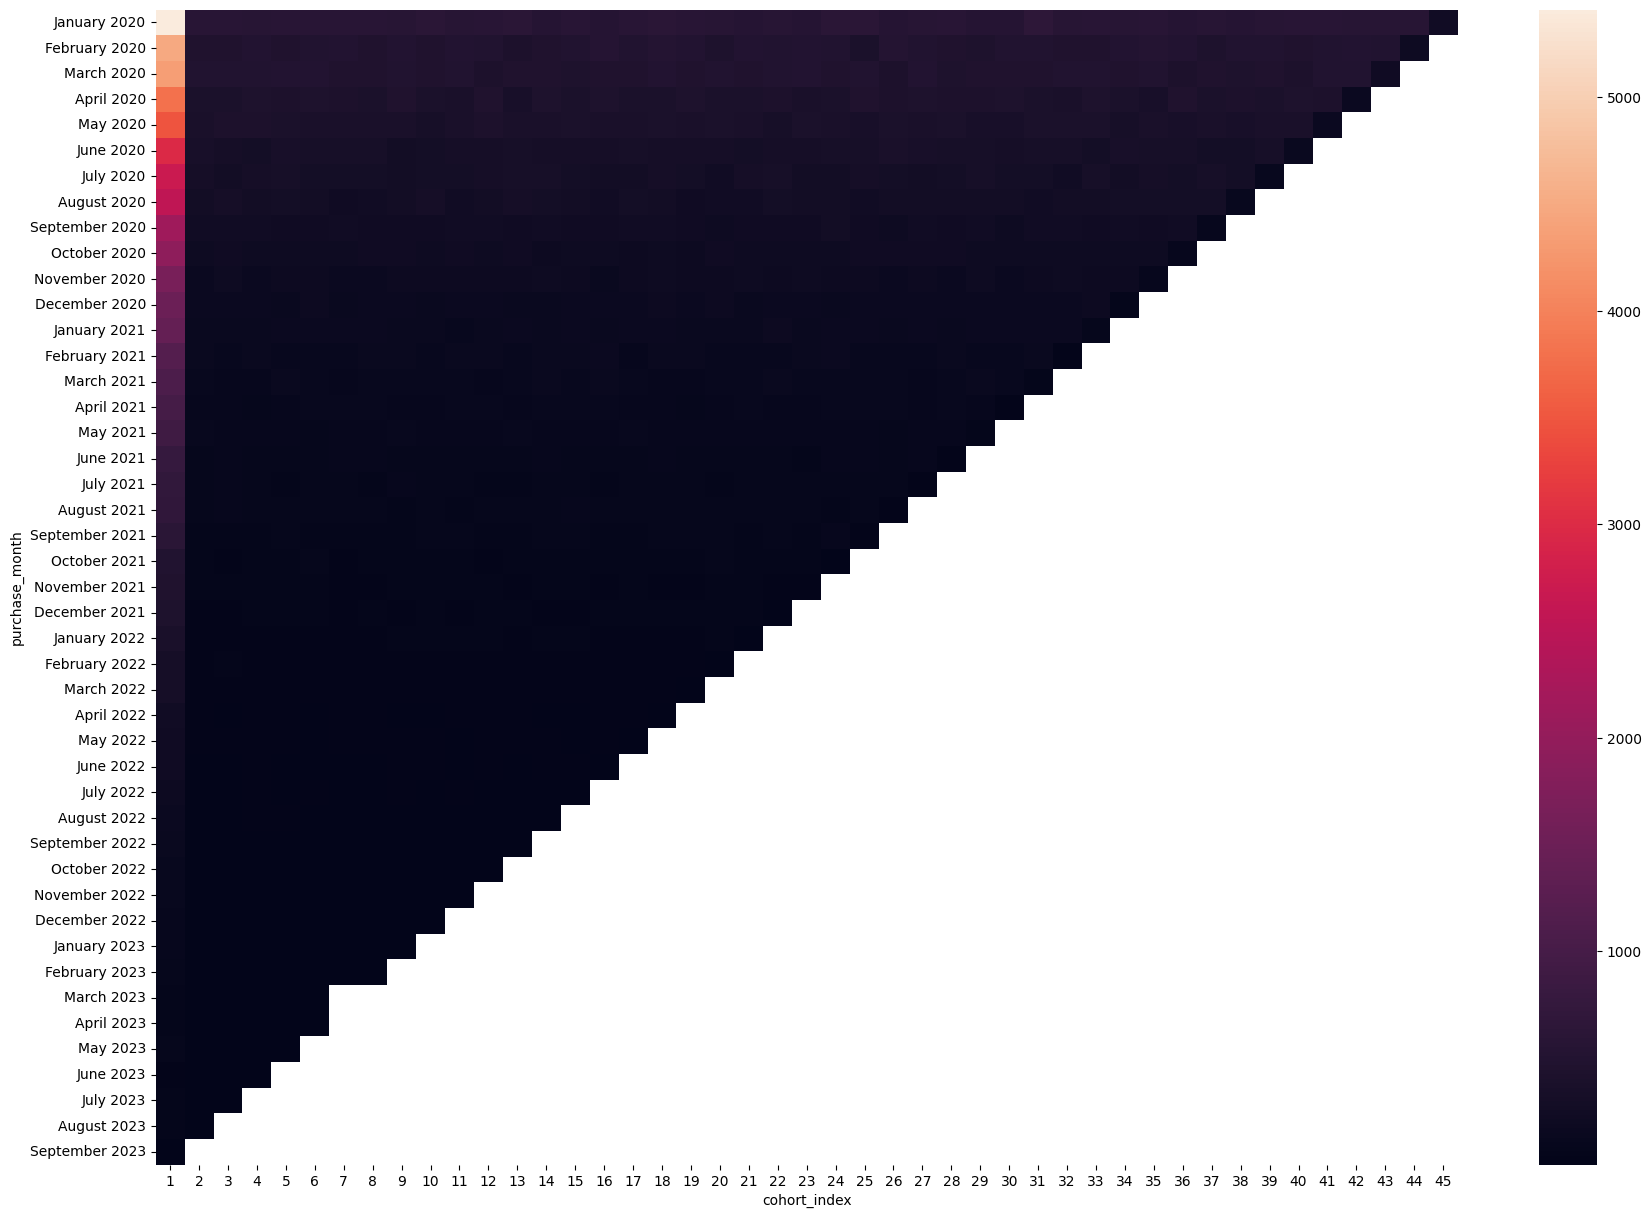

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(21, 15))
sns.heatmap(cohort_table)

In [20]:
january = cohort_table.loc['January 2020']
axis1_cohort_ratio = cohort_table.div(january, axis=1)
axis1_cohort_ratio

cohort_index,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,45
purchase_month,,,,,,,,,,,,,,,,,,,,,
January 2020,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
February 2020,0.831454,0.779514,0.779514,0.871705,0.798969,0.809932,0.839864,0.775862,0.920290,0.770000,...,0.925182,0.779570,0.859232,0.847943,0.794168,0.794218,0.875445,0.836842,0.360281,NaN
March 2020,0.801700,0.826389,0.814236,0.836555,0.862543,0.869863,0.761499,0.781034,0.871377,0.763333,...,0.737226,0.802867,0.786106,0.812165,0.723842,0.792517,0.839858,0.375439,NaN,NaN
April 2020,0.702828,0.673611,0.666667,0.745167,0.713058,0.729452,0.715503,0.686207,0.838768,0.660000,...,0.815693,0.704301,0.744059,0.719141,0.753002,0.688776,0.295374,NaN,NaN,NaN
May 2020,0.644058,0.626736,0.729167,0.741652,0.690722,0.618151,0.616695,0.631034,0.666667,0.550000,...,0.645985,0.681004,0.648995,0.654741,0.653516,0.284014,NaN,NaN,NaN,NaN
June 2020,0.548327,0.612847,0.546875,0.511424,0.584192,0.551370,0.551959,0.567241,0.492754,0.488333,...,0.609489,0.516129,0.531993,0.581395,0.234991,NaN,NaN,NaN,NaN,NaN
July 2020,0.499538,0.543403,0.460069,0.528998,0.548110,0.496575,0.482112,0.496552,0.487319,0.483333,...,0.534672,0.573477,0.535649,0.221825,NaN,NaN,NaN,NaN,NaN,NaN
August 2020,0.470893,0.446181,0.522569,0.478032,0.493127,0.462329,0.388416,0.432759,0.472826,0.515000,...,0.509124,0.494624,0.213894,NaN,NaN,NaN,NaN,NaN,NaN,NaN
September 2020,0.396600,0.420139,0.437500,0.425308,0.386598,0.388699,0.422487,0.400000,0.398551,0.373333,...,0.454380,0.189964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='cohort_index', ylabel='purchase_month'>

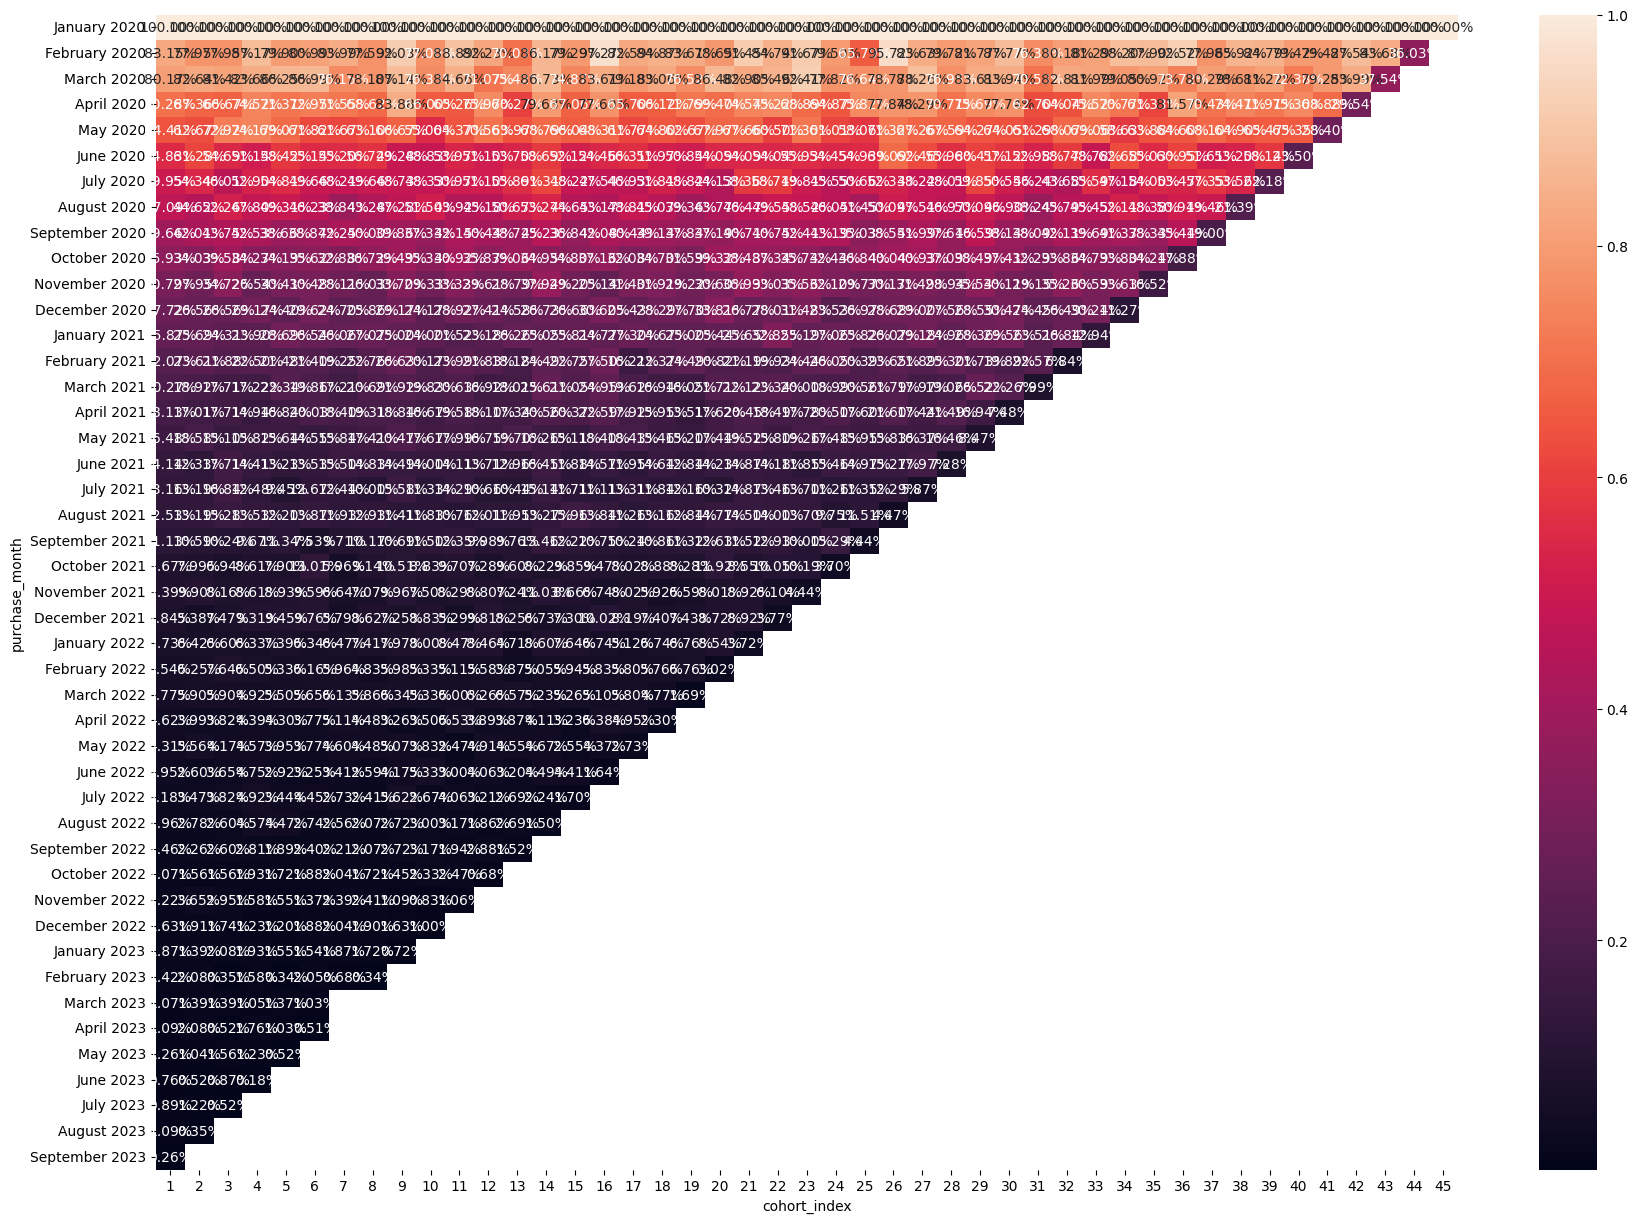

In [21]:
plt.figure(figsize=(21, 15))
sns.heatmap(axis1_cohort_ratio, annot=True, fmt='.02%')

In [22]:
first = cohort_table.iloc[:, 0]
axis0_cohort_table = cohort_table.div(first, axis=0)
axis0_cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,45
purchase_month,,,,,,,,,,,,,,,,,,,,,
January 2020,1.0,0.106450,0.106450,0.105156,0.107559,0.107928,0.108483,0.107189,0.102014,0.110885,...,0.101275,0.103123,0.101090,0.103308,0.107743,0.108668,0.103863,0.105341,0.105156,0.044539
February 2020,1.0,0.099800,0.099800,0.110247,0.103356,0.105134,0.109580,0.100022,0.112914,0.102689,...,0.112692,0.096688,0.104468,0.105357,0.102912,0.103801,0.109358,0.106024,0.045566,NaN
March 2020,1.0,0.109728,0.108114,0.109728,0.115722,0.117105,0.103043,0.104426,0.110881,0.105579,...,0.093130,0.103273,0.099124,0.104657,0.097280,0.107423,0.108806,0.049331,NaN,NaN
April 2020,1.0,0.102025,0.100973,0.111491,0.109124,0.112017,0.110439,0.104654,0.121746,0.104128,...,0.117539,0.103339,0.107021,0.105706,0.115435,0.106495,0.043650,NaN,NaN,NaN
May 2020,1.0,0.103587,0.120516,0.121090,0.115352,0.103587,0.103874,0.105022,0.105595,0.094692,...,0.101578,0.109039,0.101865,0.105022,0.109326,0.047920,NaN,NaN,NaN,NaN
June 2020,1.0,0.118975,0.106168,0.098079,0.114594,0.108527,0.109201,0.110886,0.091675,0.098753,...,0.112572,0.097068,0.098079,0.109538,0.046175,NaN,NaN,NaN,NaN,NaN
July 2020,1.0,0.115797,0.098039,0.111358,0.118017,0.107288,0.104698,0.106548,0.099519,0.107288,...,0.108398,0.118387,0.108398,0.045875,NaN,NaN,NaN,NaN,NaN,NaN
August 2020,1.0,0.100863,0.118132,0.106750,0.112637,0.105965,0.089482,0.098509,0.102433,0.121272,...,0.109498,0.108320,0.045918,NaN,NaN,NaN,NaN,NaN,NaN,NaN
September 2020,1.0,0.112768,0.117428,0.112768,0.104846,0.105778,0.115564,0.108108,0.102516,0.104380,...,0.116030,0.049394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='cohort_index', ylabel='purchase_month'>

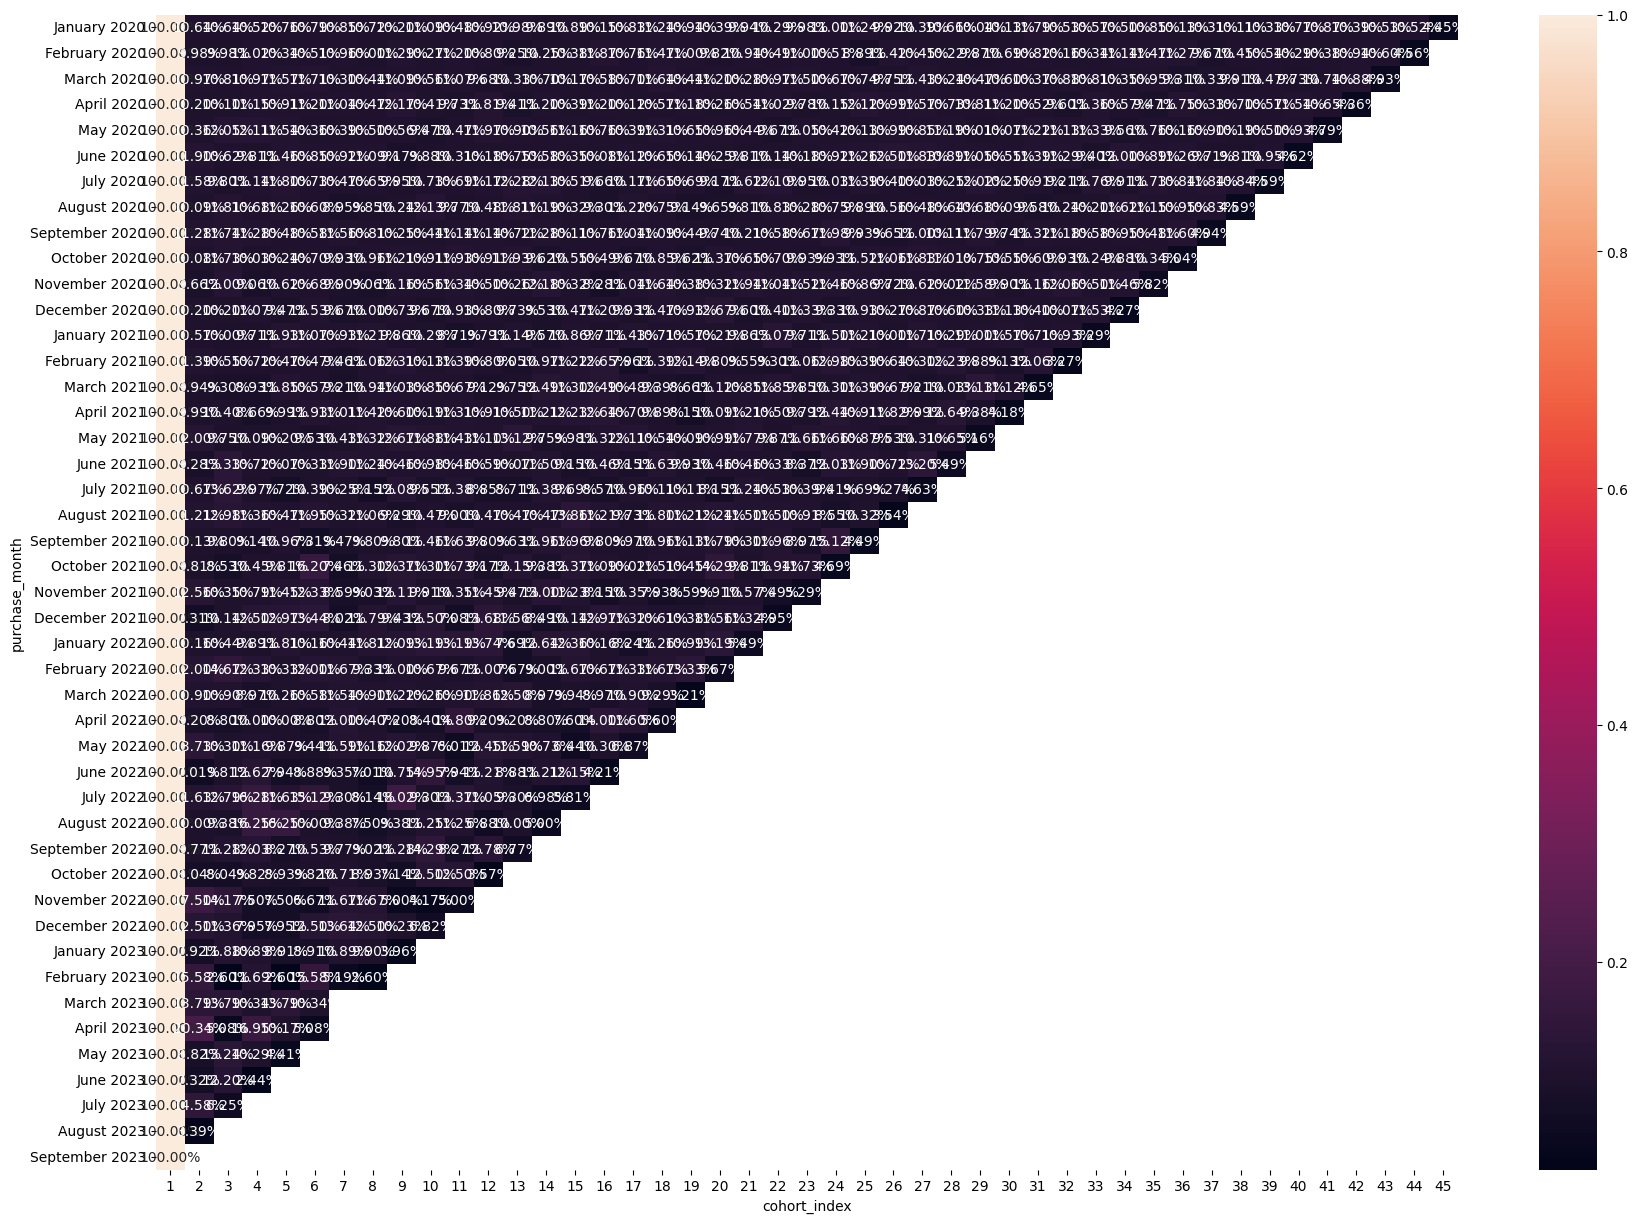

In [23]:
plt.figure(figsize=(21, 15))
sns.heatmap(axis0_cohort_table, annot=True, fmt='.02%')